## Observations and Insights 

In [279]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [280]:
# Checking the number of mice.
print(len(pd.unique(mouse_study_df['Mouse ID'])))

249


In [281]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Timepoint'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [282]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

mouse_study_clean.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [300]:
# Checking the number of mice in the clean DataFrame.
print(len(pd.unique(mouse_study_clean['Mouse ID'])))

249


## Summary Statistics

In [285]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen').count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats['Mean'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
stats['Median'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
stats['Variance'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
stats['Standard Deviation'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
stats['SEM'] = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
stats = stats[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]

print('TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN')
stats.head()

TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [286]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

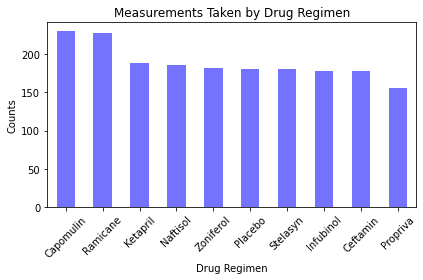

In [287]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# TODO --> figure out sorting of drug regimen by value count

# Get the counts of measurements taken by each drug regimen + plot using pandas
mouse_study_clean['Drug Regimen'].value_counts().plot(kind='bar', alpha=.55, facecolor='blue', rot='45')

# Add the title and axis labels
plt.title('Measurements Taken by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')

# Show the bar chart
plt.tight_layout()
plt.show()

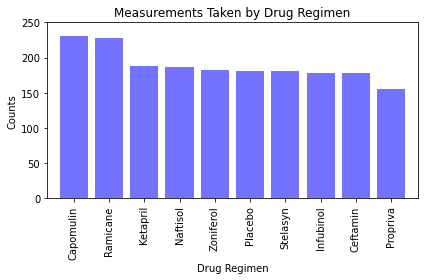

In [288]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Define the x-axis and tick locations
measures = mouse_study_clean['Drug Regimen'].value_counts()
x_axis = np.arange(len(measures))
tick_locations = [value for value in x_axis]

# Plot the bar chart and x-axis tick locations
plt.bar(x_axis, measures, color='b', alpha=.55, align='center')
plt.xticks(tick_locations, measures.index.values, rotation=90)

# Set the limits on x-axis and y-axis
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(measures)+20)

# Add chart title and axis labels
plt.title('Measurements Taken by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')

# Show the chart
plt.tight_layout()
plt.show()

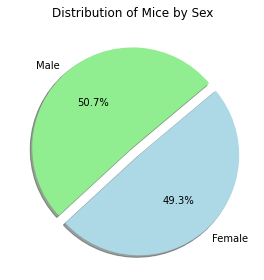

In [289]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the counts of mice by gender + plot using pandas
mouse_study_clean['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=40, explode=[0,0.1], colors=['lightgreen','lightblue'])

# Show the pie chart
plt.title('Distribution of Mice by Sex')
plt.axis('off')
plt.tight_layout()
plt.show()

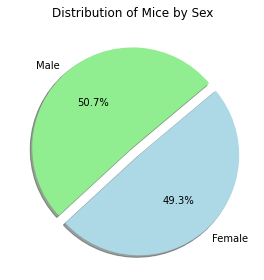

In [290]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the counts of mice by gender + plot using pyplot
sex = mouse_study_clean['Sex'].value_counts()
labels=['Male','Female']
colors=['lightgreen', 'lightblue']
explode=(0,0.1)
plt.pie(sex, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=40)

# Show the pie chart
plt.title('Distribution of Mice by Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [301]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last = tumor_vol[['Mouse ID', 'Timepoint']].merge(mouse_study_clean, on=['Mouse ID', 'Timepoint'], how='left')

tumor_vol_last

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [292]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

# for loop solved with assistance from Han-se (instructor)
for drug in drugs:
    # add subset 
    final_tumor_vols = tumor_vol_last.loc[tumor_vol_last['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
print(final_tumor_vols.round(2))

    # Determine outliers using upper and lower bounds
quartiles = final_tumor_vols.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print('----------------------------')
print(f'Lower quartile: {lowerq}')
print(f'Upper quartile: {upperq}')
print(f'Interquartile range: {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')
print('----------------------------')

outliers = final_tumor_vols[(final_tumor_vols <= lower_bound) | (final_tumor_vols >= upper_bound)]

# found the .empty reference on thispointer.com
if outliers.empty == True:
    print('There are no outliers')
else:
    print(outliers)

3      63.00
21     45.00
22     56.06
25     55.74
58     48.72
76     47.78
89     61.85
95     68.92
107    67.75
108    57.92
110    46.78
111    59.85
114    64.30
135    59.74
151    61.43
155    64.19
185    45.00
189    52.93
190    45.00
210    67.53
224    45.00
229    64.63
232    61.39
239    68.59
241    64.73
Name: Tumor Volume (mm3), dtype: float64
----------------------------
Lower quartile: 48.72207785
Upper quartile: 64.29983003
Interquartile range: 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers
----------------------------
There are no outliers


In [293]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [294]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [295]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [296]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
